In [1]:
##########################################################################
# Created on Sat Nov 10 22:33:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

# 10.3.1.Types of hedging

### 1.Short hedge

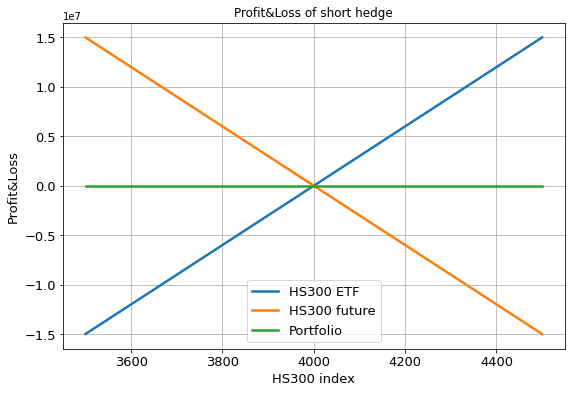

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fund=1.2e8
index=4000
N=100 #Number of Contracts
M=300 #Multifier of future

index_list=np.linspace(3500,4500,200)
profit_spot=(index_list-index)*fund/index
profit_future=-(index_list-index)*N*M
profit_portfolio=profit_spot+profit_future

plt.figure(figsize=(9,6))
plt.plot(index_list,profit_spot,label='HS300 ETF',lw=2.5)
plt.plot(index_list,profit_future,label='HS300 future',lw=2.5)
plt.plot(index_list,profit_portfolio,label='Portfolio',lw=2.5)
plt.xlabel('HS300 index',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Profit&Loss',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Profit&Loss of short hedge')
plt.legend(fontsize=13)
plt.grid()
plt.show()

### 2.Long hedge

# 10.3.2.Margin risk

In [3]:
import pandas as pd

price_IF2007=pd.read_excel('HS300 IF2007(20200619~20200717).xlsx',engine='openpyxl',sheet_name="Sheet1",header=0,index_col=0)

margin0=1.8e7 #Initial margin
N_short=100 #Number of Contracts
P0=4000 #Initial spot price
M=300 #Multifier of future

profit_sum_IF2007=-N_short*M*(price_IF2007-P0) #Cumulative PL of short position
profit_sum_IF2007=profit_sum_IF2007.rename(columns={'Settlement price':'Cumulative PL'})

profit_daily_IF2007=profit_sum_IF2007-profit_sum_IF2007.shift(1)
profit_daily_IF2007.iloc[0]=profit_sum_IF2007.iloc[0]
profit_daily_IF2007=profit_daily_IF2007.rename(columns={'Cumulative PL':'Daily PL'})

margin_daily_IF2007=profit_sum_IF2007+margin0
margin_daily_IF2007=margin_daily_IF2007.rename(columns={'Cumulative PL':'Margin balance'})

data_IF2007=pd.concat([profit_daily_IF2007,profit_sum_IF2007,margin_daily_IF2007],axis=1)
data_IF2007


,Daily PL,Cumulative PL,Margin balance
Date,,,
2020-06-19,-1734000.0,-1734000.0,16266000.0
2020-06-22,240000.0,-1494000.0,16506000.0
2020-06-23,-588000.0,-2082000.0,15918000.0
2020-06-24,-930000.0,-3012000.0,14988000.0
2020-06-29,1074000.0,-1938000.0,16062000.0
2020-06-30,-1602000.0,-3540000.0,14460000.0
2020-07-01,-2484000.0,-6024000.0,11976000.0
2020-07-02,-3372000.0,-9396000.0,8604000.0
2020-07-03,-2154000.0,-11550000.0,6450000.0


# 10.3.3.Basis risk

In [4]:
data_price=pd.read_excel('IH2009.xlsx',engine='openpyxl',sheet_name="Sheet1",header=0,index_col=0)
data_price.index=pd.DatetimeIndex(data_price.index)
data_price.index

DatetimeIndex(['2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-10',
               ...
               '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10',
               '2020-09-11', '2020-09-14', '2020-09-15', '2020-09-16',
               '2020-09-17', '2020-09-18'],
              dtype='datetime64[ns]', name='Date', length=163, freq=None)

In [5]:
data_price.columns

Index(['Contract settlement price', 'Index close price'], dtype='object')

In [6]:
basis=data_price['Contract settlement price']-data_price['Index close price']
basis.describe()

count    163.000000
mean     -60.323766
std       48.588113
min     -160.437300
25%     -110.099850
50%      -42.464200
75%      -14.170300
max       26.463800
dtype: float64

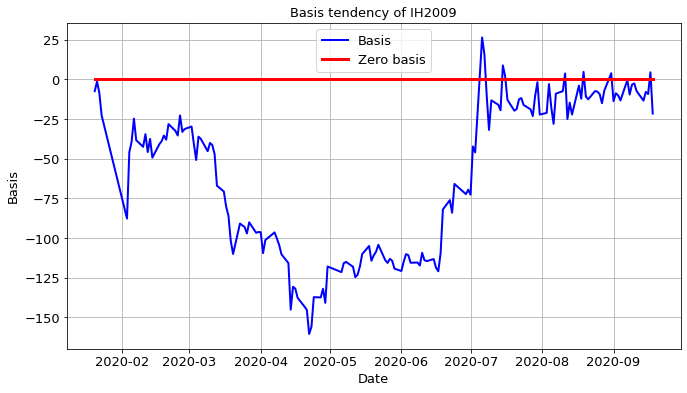

In [7]:
zero_basis=np.zeros_like(basis)
zero_basis=pd.DataFrame(zero_basis,index=basis.index)

plt.figure(figsize=(11,6))
plt.plot(basis,'b-',label='Basis',lw=2.0)
plt.plot(zero_basis,'r-',label='Zero basis',lw=3.0)
plt.xlabel('Date',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Basis',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Basis tendency of IH2009',fontsize=13)
plt.legend(fontsize=13,loc=9)
plt.grid()
plt.show()

# 10.3.4.Cross hedging

## 1.Optimal hedging ratio

$$\Delta S=\alpha+h^* \Delta F+\epsilon\tag{10-11}$$
where,\
$\Delta S$=Change of asset price\
$\Delta F$=Change of future price\
$\alpha$=Inception\
$\epsilon$=Residual\
$h^*$=Optimal hedging ratio

$$h^*=\rho \frac{\sigma_S}{\sigma_F}=\frac{\Delta S}{\Delta F}\tag{10-12}$$
where,\
$\sigma_S$:Standard deviation of $\Delta S$\
$\sigma_F$:Standard deviation of $\Delta F$\
$\rho$:Correlation between $\Delta S$ and $\Delta F$

## 2.Case study

In [8]:
fund_future=pd.read_excel('SZ180 ETF and 3 index futures.xlsx',engine='openpyxl',sheet_name="Sheet1",header=0,index_col=0)
fund_future.columns

Index(['SZ180 ETF', 'IH2009', 'IF2009', 'IC2009'], dtype='object')

In [16]:
R_fund=np.log(fund_future['SZ180 ETF']/fund_future['SZ180 ETF'].shift(1)).dropna()
R_IH2009=np.log(fund_future['IH2009']/fund_future['IH2009'].shift(1)).dropna()
R_IF2009=np.log(fund_future['IF2009']/fund_future['IF2009'].shift(1)).dropna()
R_IC2009=np.log(fund_future['IC2009']/fund_future['IC2009'].shift(1)).dropna()

In [17]:
import statsmodels.api as sm

R_IH2009_addcons=sm.add_constant(R_IH2009)
model_fund_IH2009=sm.OLS(R_fund,R_IH2009_addcons).fit()
model_fund_IH2009.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SZ180 ETF   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     1900.
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           1.10e-90
Time:                        14:11:53   Log-Likelihood:                 652.28
No. Observations:                 162   AIC:                            -1301.
Df Residuals:                     160   BIC:                            -1294.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.830      0.408      -0.000       0.001
IH2009         0.8378      0.019     43.585      0.000       0.800       0.876
==============================================================================
Omnibus:                        5.166   Durbin-Watson:                   2.336
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                6.338
Skew:                          -0.181   Prob(JB):                       0.0420
Kurtosis:                       3.899   Cond. No.                         56.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
R_IF2009_addcons=sm.add_constant(R_IF2009)
model_fund_IF2009=sm.OLS(R_fund,R_IF2009_addcons).fit()
model_fund_IF2009.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SZ180 ETF   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     2065.
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           2.31e-93
Time:                        14:13:00   Log-Likelihood:                 658.52
No. Observations:                 162   AIC:                            -1313.
Df Residuals:                     160   BIC:                            -1307.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.351      0.726      -0.001       0.001
IF2009         0.8286      0.018     45.439      0.000       0.793       0.865
==============================================================================
Omnibus:                       14.746   Durbin-Watson:                   2.366
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               37.258
Skew:                           0.274   Prob(JB):                     8.12e-09
Kurtosis:                       5.285   Cond. No.                         55.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
R_IC2009_addcons=sm.add_constant(R_IC2009)
model_fund_IC2009=sm.OLS(R_fund,R_IC2009_addcons).fit()
model_fund_IC2009.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SZ180 ETF   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     618.7
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           7.38e-57
Time:                        14:13:48   Log-Likelihood:                 573.49
No. Observations:                 162   AIC:                            -1143.
Df Residuals:                     160   BIC:                            -1137.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.746e-05      0.001     -0.031      0.975      -0.001       0.001
IC2009         0.7097      0.029     24.874      0.000       0.653       0.766
==============================================================================
Omnibus:                        5.721   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                7.739
Skew:                           0.162   Prob(JB):                       0.0209
Kurtosis:                       4.021   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion
Since IF2009 has the highest $R^2$,we choose IF2009 to hedge the ETF asset.

In [20]:
model_fund_IF2009.params

const     0.000115
IF2009    0.828601
dtype: float64

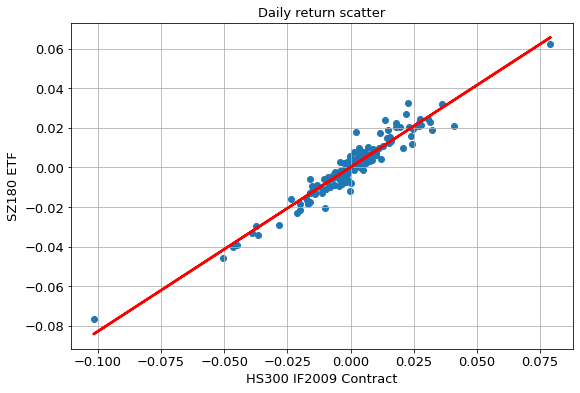

In [21]:
cons=model_fund_IF2009.params[0]
beta=model_fund_IF2009.params[1]

plt.figure(figsize=(9,6))
plt.scatter(R_IF2009,R_fund,marker='o')
plt.plot(R_IF2009,cons+beta*R_IF2009,'r-',lw=2.5)
plt.xlabel('HS300 IF2009 Contract',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('SZ180 ETF',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Daily return scatter',fontsize=13)
plt.grid()
plt.show()

## 3.Optimal number of contracts

$$N^*Q_F\Delta F=Q_A\Delta S\tag{10-13}$$
where,\
$N^*$:Optimal number of contracts\
$Q_F$:Quantity of future\
$Q_A$:Quantity of asset

Substitute (10-12) to (10-13), we have\
$$N^*=\frac{h^*Q_A}{Q_F}\tag{10-14}$$

In [23]:
def N_future(h,Q_A,Q_F):
    '''Define a function to calculate optimal number of contracts
    h:Optimal hedging ratio
    Q_A:Quantity of asset
    Q_F:Quantity of future'''
    N=h*Q_A/Q_F
    return N

In [25]:
share_fund=5e7
price_fund=4.058
value_fund=share_fund*price_fund

price_IF2011=4775.6
M=300
value_IF2011=price_IF2011*M

h_IF2011=model_fund_IF2009.params[1]
N_IF2011=N_future(h=h_IF2011,Q_A=value_fund,Q_F=value_IF2011)
print('The optimal number of future contracts is ',round(N_IF2011,0))

The optimal number of future contracts is  117.0


## 4.Dynamic P&L of portfolio

| Date               | 2020/10/12 | 2020/10/20 | 2020/10/30 | 2020-11-10 |
|--------------------|------------|------------|------------|------------|
| SZ180 ETF NPV      | 4.0580     | 4.0143     | 3.9089     | 4.0951     |
| IF2011 Close Price | 4775.6     | 4758.0     | 4683.4     | 4942.4     |

In [27]:
N=round(N_IF2011,0)
fund_list=np.array([4.0580,4.0143,3.9089,4.0951])
IF2011_list=np.array([4775.6,4758.0,4683.4,4942.4])

profit_list=share_fund*(fund_list[1:]-fund_list[0])-N*M*(IF2011_list[1:]-IF2011_list[0])
print('P&L of portfolio on 2020/10/20 is ',round(profit_list[0],2))
print('P&L of portfolio on 2020/10/30 is ',round(profit_list[1],2))
print('P&L of portfolio on 2020/11/10 is ',round(profit_list[-1],2))

P&L of portfolio on 2020/10/20 is  -1567240.0
P&L of portfolio on 2020/10/30 is  -4218780.0
P&L of portfolio on 2020/11/10 is  -3999680.0


# 10.3.5.Rolling hedging and transfer risk

In case of long hedging,\
$$R_{long}=(\tilde{F_1}-F_1)+(\tilde{F_2}-F_2)+(\tilde{F_3}-F_3)+\cdots+(\tilde{F_N}-F_N)\tag{10-15}$$
In case of short hedging,\
$$R_{short}=(F_1-\tilde{F_1})+(F_2-\tilde{F_2})+(F_3-\tilde{F_3})+\cdots+(F_N-\tilde{F_N})\tag{10-16}$$
where,\
$R_{long}$:profit of long hedging\
$R_{short}$:profit of short hedging\
$\tilde{F_N}$:contract price when close a position\
$F_N$:contract price when open a position

In [29]:
def stack_roll(F_open,F_close,M,N,position):
    '''Define a function to calculate P&L of hedging using future
    F_open:contract price when open a position, using array
    F_close:contract price when close a position, using array
    M:multifier
    N:number of future contracts
    postion:'long' indicates long position otherwise short position'''
    if position=='long':
        profit_list=(F_close-F_open)*M*N
    else:
        profit_list=(F_open-F_close)*M*N
    profit_sum=np.sum(profit_list)
    return profit_sum

In [31]:
price_open=np.array([3300.00,3790.60,3994.00,3389.00,3728.00,3918.20,3526.8])
price_close=np.array([3833.40,4081.29,3386.46,3740.14,3932.45,3624.55,4638.2])

M_future=300
N_future=100

profit_sum=stack_roll(F_open=price_open,F_close=price_close,M=M_future,N=N_future,position='short')
print('Profit of future transfer in hedging term is ',round(profit_sum,2))

Profit of future transfer in hedging term is  -47696700.0


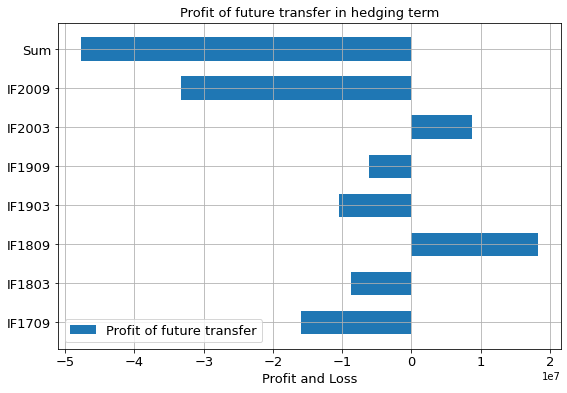

In [33]:
profit_list=(price_open-price_close)*M_future*N_future
profit_list=list(profit_list)
profit_list.append(profit_sum)

name=['IF1709','IF1803','IF1809','IF1903','IF1909','IF2003','IF2009','Sum']

plt.figure(figsize=(9,6))
plt.barh(y=name,width=profit_list,height=0.6,label='Profit of future transfer')
plt.xlabel('Profit and Loss',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Profit of future transfer in hedging term',fontsize=13)
plt.legend(loc=3,fontsize=13)
plt.grid(True)
plt.show()